## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9983097	total: 48.5ms	remaining: 48.4s
1:	learn: 0.9791173	total: 49.6ms	remaining: 24.8s
2:	learn: 0.9575855	total: 50.7ms	remaining: 16.9s
3:	learn: 0.9413206	total: 51.9ms	remaining: 12.9s
4:	learn: 0.9229901	total: 53.1ms	remaining: 10.6s
5:	learn: 0.9041520	total: 54.1ms	remaining: 8.97s
6:	learn: 0.8856845	total: 55.3ms	remaining: 7.85s
7:	learn: 0.8681748	total: 56.4ms	remaining: 7s
8:	learn: 0.8513794	total: 57.4ms	remaining: 6.32s
9:	learn: 0.8350238	total: 58.5ms	remaining: 5.79s
10:	learn: 0.8202549	total: 59.5ms	remaining: 5.35s
11:	learn: 0.8047595	total: 60.5ms	remaining: 4.98s
12:	learn: 0.7883567	total: 61.4ms	remaining: 4.66s
13:	learn: 0.7734234	total: 62.4ms	remaining: 4.39s
14:	learn: 0.7592701	total: 63.5ms	remaining: 4.17s
15:	learn: 0.7454811	total: 64.4ms	remaining: 3.96s
16:	learn: 0.7310992	total: 65.3ms	remaining: 3.78s
17:	learn: 0.7177031	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7040125	total: 67.4ms	remaining: 3.

82:	learn: 0.3352328	total: 138ms	remaining: 1.53s
83:	learn: 0.3329745	total: 140ms	remaining: 1.52s
84:	learn: 0.3307387	total: 141ms	remaining: 1.51s
85:	learn: 0.3277661	total: 142ms	remaining: 1.51s
86:	learn: 0.3253639	total: 143ms	remaining: 1.5s
87:	learn: 0.3233048	total: 144ms	remaining: 1.49s
88:	learn: 0.3213477	total: 145ms	remaining: 1.48s
89:	learn: 0.3190807	total: 146ms	remaining: 1.48s
90:	learn: 0.3168980	total: 147ms	remaining: 1.47s
91:	learn: 0.3151907	total: 148ms	remaining: 1.46s
92:	learn: 0.3139392	total: 149ms	remaining: 1.46s
93:	learn: 0.3125692	total: 150ms	remaining: 1.45s
94:	learn: 0.3108665	total: 151ms	remaining: 1.44s
95:	learn: 0.3102503	total: 152ms	remaining: 1.43s
96:	learn: 0.3089144	total: 153ms	remaining: 1.43s
97:	learn: 0.3070176	total: 154ms	remaining: 1.42s
98:	learn: 0.3054549	total: 155ms	remaining: 1.41s
99:	learn: 0.3044352	total: 156ms	remaining: 1.41s
100:	learn: 0.3030048	total: 157ms	remaining: 1.4s
101:	learn: 0.3012096	total: 158

211:	learn: 0.2111145	total: 270ms	remaining: 1s
212:	learn: 0.2108940	total: 272ms	remaining: 1s
213:	learn: 0.2100861	total: 273ms	remaining: 1s
214:	learn: 0.2095025	total: 274ms	remaining: 1000ms
215:	learn: 0.2092705	total: 275ms	remaining: 997ms
216:	learn: 0.2086198	total: 276ms	remaining: 995ms
217:	learn: 0.2080383	total: 277ms	remaining: 993ms
218:	learn: 0.2074883	total: 278ms	remaining: 991ms
219:	learn: 0.2072665	total: 279ms	remaining: 988ms
220:	learn: 0.2071082	total: 280ms	remaining: 986ms
221:	learn: 0.2065220	total: 281ms	remaining: 984ms
222:	learn: 0.2060138	total: 282ms	remaining: 982ms
223:	learn: 0.2057067	total: 283ms	remaining: 980ms
224:	learn: 0.2050792	total: 284ms	remaining: 977ms
225:	learn: 0.2043900	total: 285ms	remaining: 975ms
226:	learn: 0.2036167	total: 286ms	remaining: 973ms
227:	learn: 0.2028733	total: 287ms	remaining: 971ms
228:	learn: 0.2026075	total: 288ms	remaining: 968ms
229:	learn: 0.2020918	total: 289ms	remaining: 966ms
230:	learn: 0.201438

342:	learn: 0.1625690	total: 405ms	remaining: 775ms
343:	learn: 0.1620627	total: 406ms	remaining: 774ms
344:	learn: 0.1618732	total: 407ms	remaining: 773ms
345:	learn: 0.1617622	total: 408ms	remaining: 771ms
346:	learn: 0.1617027	total: 409ms	remaining: 770ms
347:	learn: 0.1612439	total: 410ms	remaining: 768ms
348:	learn: 0.1609575	total: 411ms	remaining: 767ms
349:	learn: 0.1606361	total: 412ms	remaining: 765ms
350:	learn: 0.1600468	total: 413ms	remaining: 764ms
351:	learn: 0.1596920	total: 414ms	remaining: 763ms
352:	learn: 0.1591969	total: 415ms	remaining: 761ms
353:	learn: 0.1587411	total: 416ms	remaining: 760ms
354:	learn: 0.1584103	total: 417ms	remaining: 758ms
355:	learn: 0.1578848	total: 418ms	remaining: 757ms
356:	learn: 0.1574156	total: 419ms	remaining: 755ms
357:	learn: 0.1573679	total: 420ms	remaining: 753ms
358:	learn: 0.1569046	total: 421ms	remaining: 752ms
359:	learn: 0.1565222	total: 422ms	remaining: 751ms
360:	learn: 0.1564756	total: 423ms	remaining: 749ms
361:	learn: 

477:	learn: 0.1264727	total: 540ms	remaining: 589ms
478:	learn: 0.1259474	total: 541ms	remaining: 588ms
479:	learn: 0.1256014	total: 542ms	remaining: 587ms
480:	learn: 0.1253362	total: 542ms	remaining: 585ms
481:	learn: 0.1253076	total: 543ms	remaining: 584ms
482:	learn: 0.1249146	total: 545ms	remaining: 583ms
483:	learn: 0.1245209	total: 546ms	remaining: 582ms
484:	learn: 0.1242724	total: 547ms	remaining: 580ms
485:	learn: 0.1240936	total: 548ms	remaining: 579ms
486:	learn: 0.1237520	total: 549ms	remaining: 578ms
487:	learn: 0.1236690	total: 550ms	remaining: 577ms
488:	learn: 0.1234382	total: 551ms	remaining: 575ms
489:	learn: 0.1231415	total: 552ms	remaining: 574ms
490:	learn: 0.1229684	total: 553ms	remaining: 573ms
491:	learn: 0.1227415	total: 554ms	remaining: 572ms
492:	learn: 0.1224962	total: 555ms	remaining: 571ms
493:	learn: 0.1222627	total: 556ms	remaining: 569ms
494:	learn: 0.1220719	total: 557ms	remaining: 568ms
495:	learn: 0.1217733	total: 558ms	remaining: 567ms
496:	learn: 

604:	learn: 0.1002186	total: 673ms	remaining: 439ms
605:	learn: 0.1000621	total: 674ms	remaining: 438ms
606:	learn: 0.0999851	total: 675ms	remaining: 437ms
607:	learn: 0.0998825	total: 676ms	remaining: 436ms
608:	learn: 0.0996846	total: 677ms	remaining: 435ms
609:	learn: 0.0994656	total: 678ms	remaining: 434ms
610:	learn: 0.0992969	total: 679ms	remaining: 432ms
611:	learn: 0.0990942	total: 680ms	remaining: 431ms
612:	learn: 0.0988758	total: 681ms	remaining: 430ms
613:	learn: 0.0987380	total: 682ms	remaining: 429ms
614:	learn: 0.0985033	total: 683ms	remaining: 428ms
615:	learn: 0.0983546	total: 684ms	remaining: 427ms
616:	learn: 0.0983391	total: 685ms	remaining: 425ms
617:	learn: 0.0981453	total: 686ms	remaining: 424ms
618:	learn: 0.0980196	total: 687ms	remaining: 423ms
619:	learn: 0.0978396	total: 688ms	remaining: 422ms
620:	learn: 0.0976301	total: 689ms	remaining: 421ms
621:	learn: 0.0975353	total: 691ms	remaining: 420ms
622:	learn: 0.0973497	total: 691ms	remaining: 418ms
623:	learn: 

731:	learn: 0.0821297	total: 802ms	remaining: 294ms
732:	learn: 0.0819758	total: 803ms	remaining: 293ms
733:	learn: 0.0818348	total: 804ms	remaining: 292ms
734:	learn: 0.0817576	total: 805ms	remaining: 290ms
735:	learn: 0.0815770	total: 807ms	remaining: 289ms
736:	learn: 0.0815031	total: 808ms	remaining: 288ms
737:	learn: 0.0814472	total: 809ms	remaining: 287ms
738:	learn: 0.0813407	total: 810ms	remaining: 286ms
739:	learn: 0.0812175	total: 811ms	remaining: 285ms
740:	learn: 0.0811713	total: 812ms	remaining: 284ms
741:	learn: 0.0810818	total: 813ms	remaining: 283ms
742:	learn: 0.0809731	total: 814ms	remaining: 281ms
743:	learn: 0.0808081	total: 815ms	remaining: 280ms
744:	learn: 0.0806236	total: 816ms	remaining: 279ms
745:	learn: 0.0805178	total: 816ms	remaining: 278ms
746:	learn: 0.0803992	total: 818ms	remaining: 277ms
747:	learn: 0.0803440	total: 819ms	remaining: 276ms
748:	learn: 0.0802057	total: 820ms	remaining: 275ms
749:	learn: 0.0800412	total: 821ms	remaining: 274ms
750:	learn: 

863:	learn: 0.0680464	total: 936ms	remaining: 147ms
864:	learn: 0.0679629	total: 937ms	remaining: 146ms
865:	learn: 0.0678292	total: 938ms	remaining: 145ms
866:	learn: 0.0677323	total: 940ms	remaining: 144ms
867:	learn: 0.0676971	total: 941ms	remaining: 143ms
868:	learn: 0.0676577	total: 942ms	remaining: 142ms
869:	learn: 0.0675790	total: 943ms	remaining: 141ms
870:	learn: 0.0675072	total: 944ms	remaining: 140ms
871:	learn: 0.0674224	total: 945ms	remaining: 139ms
872:	learn: 0.0673925	total: 945ms	remaining: 138ms
873:	learn: 0.0673549	total: 946ms	remaining: 136ms
874:	learn: 0.0672154	total: 947ms	remaining: 135ms
875:	learn: 0.0670984	total: 948ms	remaining: 134ms
876:	learn: 0.0669745	total: 950ms	remaining: 133ms
877:	learn: 0.0669005	total: 951ms	remaining: 132ms
878:	learn: 0.0667642	total: 952ms	remaining: 131ms
879:	learn: 0.0667516	total: 952ms	remaining: 130ms
880:	learn: 0.0666232	total: 954ms	remaining: 129ms
881:	learn: 0.0665126	total: 955ms	remaining: 128ms
882:	learn: 

995:	learn: 0.0576778	total: 1.07s	remaining: 4.3ms
996:	learn: 0.0576415	total: 1.07s	remaining: 3.22ms
997:	learn: 0.0575262	total: 1.07s	remaining: 2.15ms
998:	learn: 0.0574460	total: 1.07s	remaining: 1.07ms
999:	learn: 0.0574038	total: 1.07s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

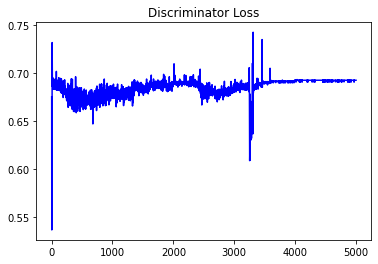

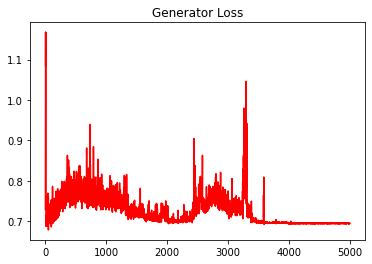

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

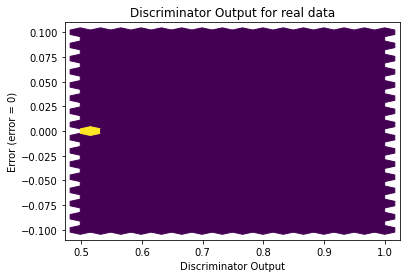

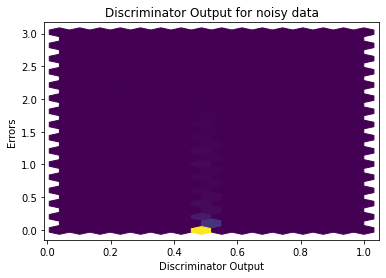

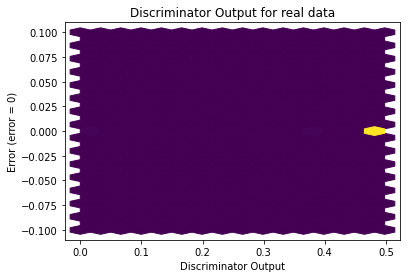

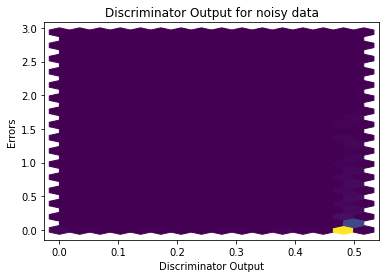

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


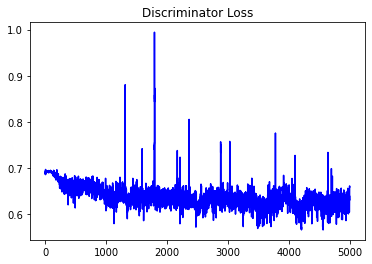

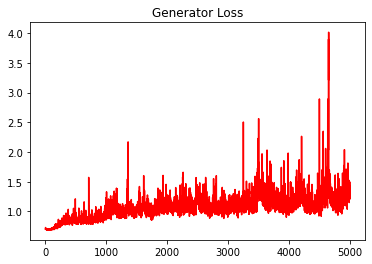

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

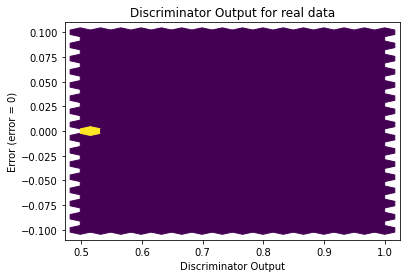

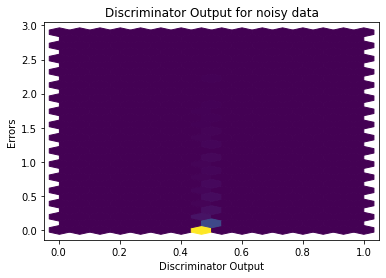

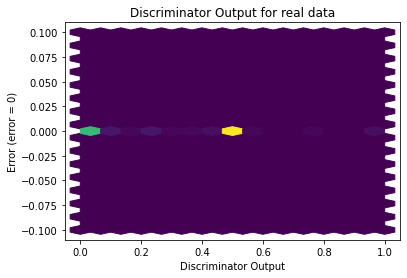

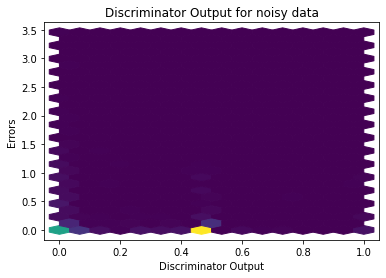

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
